# Usuaris amb moltes ofertes vs usuaris amb poques

## Dues imatges de datashader: 
* Una amb tot
* l'altre sense els usuaris que tenen més de 5 ofertes 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from functools import partial
import datashader as ds
import datashader.transfer_functions as tf
from datashader.utils import export_image
from datashader.colors import viridis, colormap_select

from colorcet import fire
from IPython.core.display import HTML, display

In [2]:
data = pd.read_csv('listings_clean.csv')

### Imatge 1 (amb tot)

In [3]:
location = pd.DataFrame([data.longitude, data.latitude]).T

In [4]:
cm = partial(colormap_select)

cvs = ds.Canvas(plot_width=700, plot_height=700)
agg = cvs.points(location, 'longitude', 'latitude')#, ds.mean('z_col'))
img = tf.shade(agg, cmap=cm(fire, 0.2), how='eq_hist')

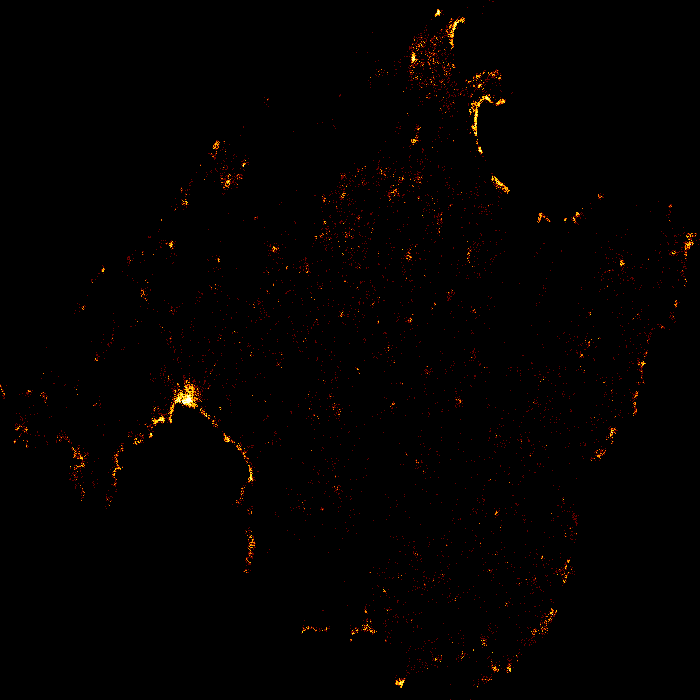

In [5]:
export_image(img,'datashader_total', background='black')

### Imatge 2: $n$ ofertes $< 5$

In [6]:
data['host_since'] = pd.to_datetime(data['host_since'])
data['host_timing']=np.ones(len(data))

host_id_amount = data.groupby(['host_id']).host_timing.sum()
host_id_amount = host_id_amount.sort_values(ascending=False)
less10 = host_id_amount[host_id_amount<5] #Defineix el nombre de ofertes màxim

data_less10=data[data.host_id.isin(less10.index.values)] #mapeig de usuaris amb menys de 5 ofertes
location10 = pd.DataFrame([data_less10.longitude, data_less10.latitude]).T

In [7]:
cm = partial(colormap_select)

cvs = ds.Canvas(plot_width=700, plot_height=700)
agg = cvs.points(location10, 'longitude', 'latitude')
img = tf.shade(agg, cmap=cm(fire, 0.2), how='eq_hist')

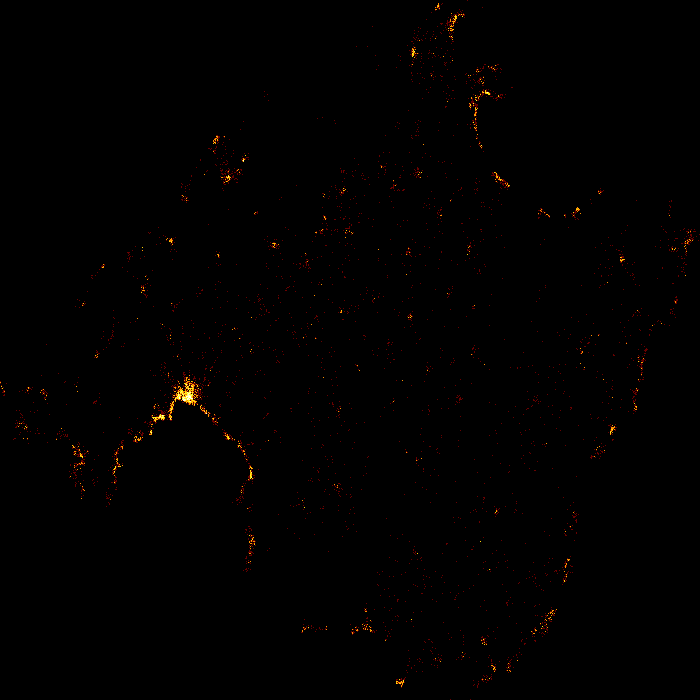

In [8]:
export_image(img,'datashader_less10', background='black')

La diferència és casi inapreciable :~0. Possiblement degut a l'agregació del datashader 

In [9]:
print 'Nombre de Airbnbs de hosts amb menys de 5 ofertes: '+ str(len(location10))
print 'Nombre de Airbnbs totals: '+ str(len(location))

Nombre de Airbnbs de hosts amb menys de 5 ofertes: 7732
Nombre de Airbnbs totals: 14858


# Animació mensual 

<div class="alert alert-info">
**TO DO**: Preparar Dataframe per fer animació mensual de l'augment d'Airbnbs
</div>

# Mapa interactiu

info de https://www.continuum.io/blog/developer-blog/analyzing-and-visualizing-big-data-interactively-your-laptop-datashading-2010-us

In [15]:
print 'max/min latitud:'
print max(location.latitude)
print min(location.latitude)
print '-'*15
print 'max/min longitud:'
print max(location.longitude)
print min(location.longitude)

max/min latitud:
39.9292926985
39.3019732071
---------------
max/min longitud:
3.47561083339
2.34782960292


In [16]:
x_range, y_range=((3.5,2.4),(39.32,40.))

In [17]:
import bokeh.plotting as bp
from bokeh.models.tiles import WMTSTileSource

bp.output_notebook()

def base_plot(tools='pan,wheel_zoom,reset',webgl=False):
    p = bp.figure(tools=tools,
         plot_width=int(900), plot_height=int(500),
         x_range=x_range, y_range=y_range, outline_line_color=None,
         min_border=0, min_border_left=0, min_border_right=0,
         min_border_top=0, min_border_bottom=0, webgl=webgl)

    p.axis.visible = False
    p.xgrid.grid_line_color = None
    p.ygrid.grid_line_color = None

    return p

p = base_plot()

url="http://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{Z}/{Y}/{X}.png" 
tile_renderer = p.addtile(WMTSTileSource(url=url)) 
tile_renderer.alpha=1.0

Loading BokehJS ...

AttributeError: 'Figure' object has no attribute 'addtile'

In [10]:
from datashader.bokeh_ext import InteractiveImage

def image_callback(x_range, y_range, w, h):
    cvs = ds.Canvas(plot_width=w, plot_height=h, x_range=x_range, y_range=y_range)
    agg = cvs.points(df, 'meterswest', 'metersnorth', ds.count_cat('race'))
    img = tf.colorize(agg, color_key, 'log')
    return tf.dynspread(img,threshold=0.75, max_px=8)

InteractiveImage(p, image_callback)

NameError: name 'p' is not defined